# Capstone: International Airline Reports Data Analysis

## Reading Data and Imports

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
import sys as sys
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [197]:
#if csv/if excel/if sql/ allow for reading different types of files
def read (filename, filetype):
    if filetype == '.csv':
        df = pd.read_csv(filename)
    elif filetype == '.xslx':
        df = pd.read_excel(filename)
    elif filetype == '.sql':
        #df = pd.read_sql(sql, con, index_col=None) ##get the right libraries
        print('Please use sql engine and connect to sql database')
    return df

In [198]:
def listfiles (directory, extension):
    # user can input any directory here as well
    # if the user wants another file added, just add it to this directory and rerun the code
    filenames = []
    for file in os.listdir():
        if file.endswith(extension):
            filenames.append(file)
        else:
            continue
    return filenames

In [199]:
# list directory
directory = 'EDA-airlines-project'
extension = ('.csv', '.xslx', '.sql')
filenames = listfiles(directory, extension)

In [200]:
filenames

['International_Report_Departures.csv', 'International_Report_Passengers.csv']

In [201]:
readfiles = []
renames = []
for i in range(len(filenames)):
    print('File to be read:', filenames[i],'\n')
    index = os.path.splitext(filenames[i])  ##returns tuple
    file_name = index[0]
    renames.append(file_name)
    readfiles.append(file_name)
    print('File name:', file_name,'\n')
    file_ext = index[1]
    print('File extension:', file_ext,'\n')
    readfiles[i] = read(filenames[i], file_ext)

File to be read: International_Report_Departures.csv 

File name: International_Report_Departures 

File extension: .csv 

File to be read: International_Report_Passengers.csv 

File name: International_Report_Passengers 

File extension: .csv 



In [202]:
dfcount = len(readfiles)
dfcount

2

## Data Understanding

In [203]:
# general EDA so use readfiles list of dataframes
readfiles[dfcount-dfcount].head()   ## first df is 0

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [204]:
readfiles[dfcount-1].head()  ## last df is dfcount -1

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76


In [205]:
# shape
print(type(readfiles))
print(type(readfiles[0])) # check each list element is a dataframe
df0shape = readfiles[0].shape
df_1shape = readfiles[dfcount - 1].shape 
print('shape of first df:', df0shape)  # first df
print('shape of first df:', df_1shape) # last df

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
shape of first df: (930808, 16)
shape of first df: (680985, 16)


In [206]:
readfiles[0].head(2)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15


In [207]:
readfiles[dfcount - 1].head(2)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683


In [208]:
# columns of first element, readfiles[0]
df0columns = readfiles[0].columns
df_1columns = readfiles[dfcount - 1].columns
print('columns of first df:________________\n', df0columns)
print('columns of last df:________________\n', df_1columns)

columns of first df:________________
 Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')
columns of last df:________________
 Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


In [209]:
df0dtypes = readfiles[0].dtypes 
df_1dtypes = readfiles[dfcount - 1].dtypes
print('dtypes of columns of first df:______________\n', df0dtypes)

dtypes of columns of first df:______________
 data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object


In [210]:
print('dtypes of columns of last df:______________\n', df_1dtypes)

dtypes of columns of last df:______________
 data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object


In [211]:
readfiles[0].describe()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000
mean,2006.021361,6.414783,12809.473781,42.511740,13484.676238,466.910479,20057.217505,0.599361,40.003181,2.005483,42.008665
std,8.558831,3.471070,2716.223845,27.571338,1932.601107,288.005971,479.071456,0.490028,60.948973,8.278403,60.340835
min,1990.000000,1.000000,10010.000000,1.000000,10119.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11868.000000,205.000000,19704.000000,0.000000,0.000000,0.000000,3.000000
50%,2007.000000,6.000000,12892.000000,33.000000,13408.000000,427.000000,19991.000000,1.000000,17.000000,0.000000,20.000000
75%,2014.000000,9.000000,13487.000000,72.000000,15084.000000,736.000000,20312.000000,1.000000,60.000000,1.000000,60.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,2019.000000,1092.000000,2019.000000


In [212]:
readfiles[dfcount - 1].describe()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000
mean,2006.141110,6.366576,12779.103825,44.394527,13493.331869,468.122264,20031.610461,0.562233,6478.893801,196.740288,6675.634089
std,8.716122,3.466745,2510.939346,28.110753,1955.917890,292.799407,510.270976,0.496112,8622.704655,954.759814,8532.400269
min,1990.000000,1.000000,10010.000000,1.000000,10125.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11760.000000,204.000000,19623.000000,0.000000,142.000000,0.000000,633.000000
50%,2007.000000,6.000000,12889.000000,33.000000,13408.000000,429.000000,19917.000000,1.000000,3561.000000,0.000000,3803.000000
75%,2014.000000,9.000000,13796.000000,74.000000,15092.000000,736.000000,20312.000000,1.000000,9700.000000,0.000000,9761.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,149898.000000,58284.000000,150195.000000


In [213]:
#readfiles[dfcount - 1].pivot_table(values = 'Charter', index = 'Year', aggfunc = np.mean)

### Data Preparation

In [214]:
readfiles[0].head(2)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15


In [215]:
readfiles[dfcount-1].head(2)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683


In [216]:
# identify repetitive column name between first and last df
if len(df0columns) > len(df_1columns):
    columnseries = len(df0columns)
else:
    columnseries = len(df_1columns)

repetitivecols = []
for col in range(columnseries):
    if df0columns[col] == df_1columns[col]:
        repetitivecols.append(df0columns[col])
        #print('Repetitive column is:\n', df0columns[col])
    else:
        print('Column ', df0columns[col], 'is not repetitive')

if len(repetitivecols) == 0:
    print('Columns of each df are unique')
elif len(repetitivecols) == columnseries:
    print('All columns are repeated between dfs')# then ask user if he wants to merge the dfs after nulls of each have been filled
else:
    print('The number of repeated columns is: ', len(repetitivecols))

repetitivecols

All columns are repeated between dfs


['data_dte',
 'Year',
 'Month',
 'usg_apt_id',
 'usg_apt',
 'usg_wac',
 'fg_apt_id',
 'fg_apt',
 'fg_wac',
 'airlineid',
 'carrier',
 'carriergroup',
 'type',
 'Scheduled',
 'Charter',
 'Total']

In [217]:
#check duplicated rows
def checkduplicates(Dataframe):
    duplicates = Dataframe.duplicated().tolist()
    if 'True' in duplicates:
        print('Duplicates found')
        indices = duplicates.index('True')
    else:
        print('No duplicates found')
        indices = 0
    return indices

In [218]:
#return 2 lists, Numerical columns and Categorical columns
def types(Dataframe):
    numerical = Dataframe.select_dtypes(exclude = ['object']).columns.tolist()
    categorical = Dataframe.select_dtypes(include = ['object']).columns.tolist()
    return numerical, categorical

In [219]:
#allow user to search through df
def searchdf(Dataframe):
    print(Dataframe.columns)
    usersearch = input('Would you like search for a row value? Y/y or N/n?')
    while usersearch == 'Y' or usersearch == 'y':
        query1 = str(input('What feature are you searching for? '))
        if query1 in Dataframe.columns :
            print('feature is found')
        else:
            print('feature cannot be found , break')
            break

        #c, n = types(Dataframe)
        #if query in c: 
        value = str(input('the new value: '))
        #else:
            #value = int(input('the new value: '))
        if value == Dataframe[query1].unique() :
            print('feature is common, will be output')
        else:
            print('feature is not common, break')
            break
        string = str(query1) + "==" + str(value)
        print(readfiles[0].query(string))
        usersearch = input('Repeat? ')

In [220]:
#renaming columns
#user can rename columns in dataframe  
def rename(Dataframe):
    numerical, categorical = types(Dataframe)
    renamenumerical = input('Would you like to rename the numerical type columns, Y/y or N/n ?\n')
    if renamenumerical == 'Y' or renamenumerical == 'y':
        repeat = 'y'
        print('These are the numerical columns:\n', numerical)
        while repeat == 'y' or repeat == 'Y':
            column = input('Write the column here:\n ')
            newname = input('Write the new name here:\n ')
            if column in numerical:
                Dataframe = Dataframe.rename(columns = {column : newname})
                print('Successfully renamed')
                flag = 1
            else:
                flag = 0  ##unsuccessful renaming, try again
                print('Unsuccessfully renamed')
                
            repeat = input('Repeat?')
    renamecategorical = input('Would you like to rename the categorical type columns, Y/y or N/n ?\n')
    if renamecategorical == 'Y' or renamecategorical == 'y':
        repeat = 'y'
        print('These are the categorical columns:\n', categorical)
        while repeat == 'y' or repeat == 'Y':
            column = input('Write the column here:\n ')
            newname = input('Write the new name here:\n ')
            if column in categorical:
                Dataframe = Dataframe.rename(columns = {column : newname})
                print('Successfully renamed')
                flag = 1
            else:
                flag = 0  ##unsuccessful renaming, try again
                print('Unsuccessfully renamed')
                
            repeat = input('Repeat?')
    return Dataframe.copy() 

In [221]:
checkduplicates(readfiles[0])##rows only

No duplicates found


0

In [222]:
def duplicatecols(Dataframe):
    duplicatecols = Dataframe.columns[Dataframe.columns.duplicated()]
    if duplicatecols.empty:
        print('There are no duplicated cols in this dataframe')
        df = Dataframe##don't drop duplicates
    else:
        print(duplicatecols)
        df = Dataframe.drop(columns = duplicatecols, inplace = True)##drop duplicates
    return duplicatecols, df

In [223]:
def duplicaterows(Dataframe):
    duplicaterows = Dataframe[Dataframe.duplicated()]
    if duplicaterows.empty:
        print('No duplicated rows found')
        df = Dataframe##don't drop duplicates
    else:
        print(duplicaterows)##drop duplicates
        df = Dataframe.drop_duplicates(keep = 'last', inplace = True)
    return duplicaterows, df

In [224]:
duplicaterows0, readfiles[0] = duplicaterows(readfiles[0])

No duplicated rows found


In [225]:
duplicatecols0, readfiles[0] = duplicatecols(readfiles[0])

There are no duplicated cols in this dataframe


In [226]:
checkduplicates(readfiles[dfcount - 1])

No duplicates found


0

In [227]:
duplicaterows_1, readfiles[dfcount -1] = duplicaterows(readfiles[dfcount-1])

No duplicated rows found


In [228]:
duplicatecols_1, readfiles[dfcount -1] = duplicatecols(readfiles[dfcount-1])

There are no duplicated cols in this dataframe


In [229]:
#rename columns
df0renamed = rename(readfiles[0]) 

Would you like to rename the numerical type columns, Y/y or N/n ?
n
Would you like to rename the categorical type columns, Y/y or N/n ?
n


In [230]:
df0renamed.head(2)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15


In [231]:
df_1renamed = rename(readfiles[dfcount-1])

Would you like to rename the numerical type columns, Y/y or N/n ?
n
Would you like to rename the categorical type columns, Y/y or N/n ?
y
These are the categorical columns:
 ['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type']
Write the column here:
 data_dte
Write the new name here:
 DATE
Successfully renamed
Repeat?n


In [232]:
df_1renamed.head(2)

,DATE,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683


In [233]:
def nullvalues(Dataframe, dfcolumns):
    #identify column index with nulls and remove them
    nullindices =[]
    for col in range(len(dfcolumns)):
        if (Dataframe[dfcolumns[col]].isna().sum()) == 0:
            print('Column : ',dfcolumns[col], 'has no null values')
            df = Dataframe
        else:
            nullindices.append(col)
            print('___________________')
            print('Column : ',dfcolumns[col], 'has null values\n')
            print('___________________')
            print('Potential Unique Values to Fill:\n', Dataframe[dfcolumns[col]].unique())
            value = input('Now, you should fill this column in a value of your choice: ')
            df = Dataframe.fillna(value, inplace = True)
    return nullindices, df

In [234]:
nullindices0, df0renamed = nullvalues(readfiles[0], df0columns)

Column :  data_dte has no null values
Column :  Year has no null values
Column :  Month has no null values
Column :  usg_apt_id has no null values
Column :  usg_apt has no null values
Column :  usg_wac has no null values
Column :  fg_apt_id has no null values
Column :  fg_apt has no null values
Column :  fg_wac has no null values
Column :  airlineid has no null values
___________________
Column :  carrier has null values

___________________
Potential Unique Values to Fill:
 ['PFQ' '5Y' 'GL' 'AMQ' '5L' 'JN' 'MMQ' 'AC' 'U5' 'GFQ' 'AM' 'L2' 'TZ' 'WO'
 'EZ' nan 'VSA' 'T9' 'AUQ' '3M' 'KAQ' 'LH' '9S' 'GG' 'WAP' 'SLQ' 'XP' 'U7'
 'PCQ' '13Q' 'GR' 'PRQ' 'TRA' 'JL' 'ABX' 'FX' 'E9' 'EUQ' 'PN' 'RYQ' '6B'
 'PT' 'MG' 'RD' 'CC' 'POQ' 'CS' 'RNQ' 'A2' 'PLQ' 'DL' 'XG' 'KE' 'SVW'
 'VIQ' 'CCQ' 'NLQ' 'ZX' 'BNQ' 'BRQ' 'W8' 'AD' 'CYQ' 'X9' 'CEQ' '8C' 'MX'
 '0WQ' 'CAQ' 'TCQ' 'LGQ' 'GBQ' 'MP' 'TZQ' 'KLQ' 'JAG' 'WE' 'PO' 'SY' 'G4'
 'FCQ' '0BQ' 'CO' 'SEQ' 'KTQ' 'C6' 'OW' 'FE' 'K8' 'NW' 'XE' 'ER' 'N6'
 '05Q' 'TN

In [235]:
for x in range(len(nullindices0)):
    print(df0renamed[pd.isnull(df0renamed[df0columns[x]])])##check null values have been filled

Empty DataFrame
Columns: [data_dte, Year, Month, usg_apt_id, usg_apt, usg_wac, fg_apt_id, fg_apt, fg_wac, airlineid, carrier, carriergroup, type, Scheduled, Charter, Total]
Index: []


In [236]:
searchdf(df0renamed)  ##search through common values

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')
Would you like search for a row value? Y/y or N/n?n


In [237]:
nullindices_1, df_1renamed = nullvalues(readfiles[dfcount-1], df_1columns)

Column :  data_dte has no null values
Column :  Year has no null values
Column :  Month has no null values
Column :  usg_apt_id has no null values
Column :  usg_apt has no null values
Column :  usg_wac has no null values
Column :  fg_apt_id has no null values
Column :  fg_apt has no null values
Column :  fg_wac has no null values
Column :  airlineid has no null values
___________________
Column :  carrier has null values

___________________
Potential Unique Values to Fill:
 ['AM' 'C6' 'RD' 'MG' 'TZ' 'SLQ' 'CO' '0BQ' 'RGQ' 'WO' '3M' 'T9' 'OW' 'FCQ'
 'SEQ' 'GL' 'AS' 'X9' 'PCQ' 'W8' '5X' 'ZX' 'RYQ' 'MMQ' 'DL' 'XP' 'NW' 'JL'
 'USQ' 'TZQ' '4N' 'G4' nan 'UA' 'PBQ' 'TBQ' 'U5' 'KAH' 'YX' 'LGQ' 'BY'
 'PPQ' 'MX' '04Q' 'AC' '0J' 'PLQ' 'SY' 'CAZ' 'F9' 'BNQ' 'SVW' '09Q' 'CS'
 'CC' 'RNQ' 'AA' 'PN' '4T' '8E' 'GBQ' 'B6' '0CQ' 'XG' '5L' 'BZQ' '14Q'
 'E9' 'DE' 'S4' '05Q' 'MT' '0JQ' 'KE' 'CAQ' '0UQ' '0VQ' '0HQ' 'VSA' 'BCQ'
 'FI' 'JAG' '0WQ' 'SI' 'FE' 'ZB' 'XE' '0LQ' 'SM' 'BRQ' 'JN' 'TIQ' '6B'
 '13Q' '0R

In [238]:
#df_1renamed[df_1renamed['carrier'] == 'Default']
for x in range(len(nullindices_1)):
    print(df_1renamed[pd.isnull(df_1renamed[df_1columns[x]])])##check null values have been filled

Empty DataFrame
Columns: [data_dte, Year, Month, usg_apt_id, usg_apt, usg_wac, fg_apt_id, fg_apt, fg_wac, airlineid, carrier, carriergroup, type, Scheduled, Charter, Total]
Index: []


In [239]:
searchdf(df_1renamed)

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')
Would you like search for a row value? Y/y or N/n?n


In [240]:
#remove index column
df0noindex = df0renamed.reset_index(drop = True).copy()
df_1noindex = df_1renamed.reset_index(drop = True).copy()

In [241]:
readfiles[0].head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


## Feature Understanding and Visualisation

In [242]:
#return 2 lists, Numerical columns and Categorical columns
def types(Dataframe):
    pd.DataFrame(Dataframe)
    numerical = Dataframe.select_dtypes(exclude = ['object']).columns.tolist()
    categorical = Dataframe.select_dtypes(include = ['object']).columns.tolist()
    return numerical, categorical

In [243]:
#grouping by numerical and categorical features
df0numerical, df0categorical = types(df0noindex)
df_1numerical, df_1categorical = types(df_1noindex)

In [244]:
#encoding
print('First df categorical: ', df0categorical)
print('Last df categorical:', df_1categorical)

First df categorical:  ['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type']
Last df categorical: ['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type']


In [245]:
#dummies to get binary data 
'''df0binary = []
df_1binary = []
for col in range(len(df0categorical)):
    df0binary.append(pd.get_dummies(df0noindex[df0columns[col]].head(100)))'''

'df0binary = []\ndf_1binary = []\nfor col in range(len(df0categorical)):\n    df0binary.append(pd.get_dummies(df0noindex[df0columns[col]].head(100)))'

In [246]:
'''for col2 in range(len(df_1categorical)):
    df_1binary.append(pd.get_dummies(df_1noindex[df_1columns[col]].head(100)))'''

'for col2 in range(len(df_1categorical)):\n    df_1binary.append(pd.get_dummies(df_1noindex[df_1columns[col]].head(100)))'

In [247]:
#readfiles[dfcount - 1].pivot_table(values = 'Charter', index = 'Year', aggfunc = np.mean)
'''print('Binary categorical data of first df:\n')
for x in range(len(df0binary)):
    print(df0columns[x], '\n')
    print(df0binary[x].head(5))
    print('_______________________________')'''

"print('Binary categorical data of first df:\n')\nfor x in range(len(df0binary)):\n    print(df0columns[x], '\n')\n    print(df0binary[x].head(5))\n    print('_______________________________')"

In [248]:
'''print('Binary categorical data of last df:\n')
for x in range(len(df_1binary)):
    print(df_1columns[x], '\n')
    print(df_1binary[x].head(5))
    print('_______________________________')'''

"print('Binary categorical data of last df:\n')\nfor x in range(len(df_1binary)):\n    print(df_1columns[x], '\n')\n    print(df_1binary[x].head(5))\n    print('_______________________________')"

Suggested features of first df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Suggested features of last df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Pivot table of first df of values: Charter |index: Year
       Charter
Year          
1990  2.485045
1991  2.571795
1992  2.969327
1993  2.861546
1994  2.759273
1995  2.688394
1996  2.540299
1997  2.556393
1998  2.272396
1999  2.247189
2000  2.233682
2001  1.785093
2002  2.136635
2003  2.770115
2004  2.668927
2005  2.372374
2006  2.062823
2007  1.946494
2008  1.700375
2009  1.477439
2010  1.656712
2011  1.573551
2012  1.522388
2013  1.454280
2014  1.424329
2015  1.454366
2016  1.3

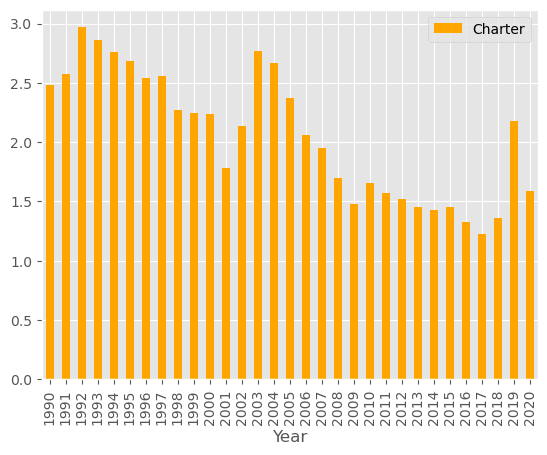

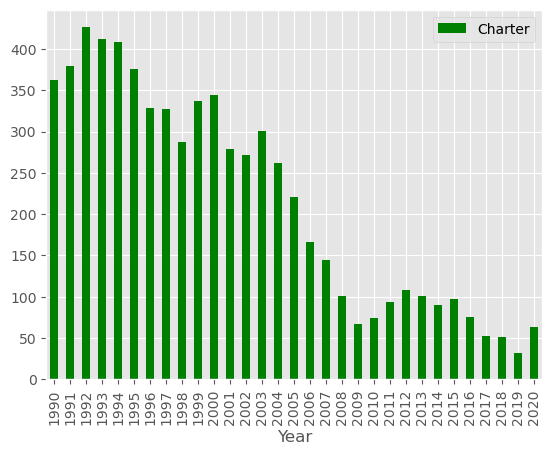

In [98]:
#pivot tables by numerical and categorical features
print('Suggested features of first df: ', df0columns)
print('\n')
print('Suggested features of last df: ', df_1columns)
print('\n')
pivot = input('Should the numerical/categorical data be summarised by mean? Y/y or N/n? ')

while pivot == 'Y' or pivot == 'y':
    values = str(input('What attribute shall be valued? '))
    index = str(input('How should the pivot table be indexed? '))
    dfid = int(input('And in which df? 0/-1?'))
    if (values in df0columns) and (index in df0columns) and (dfid == 0):
        print('Pivot table of first df of values:',values,'|index:',index)
        df0pivotmean = df0noindex.pivot_table(values = values, index = index, aggfunc = np.mean)
        print(df0pivotmean)
        df0pivotmean.plot(kind = 'bar', color = 'orange', fontsize = 10)
    elif (values in df_1columns) and (index in df_1columns) and (dfid == -1):
        print('Pivot table of last df of values:',values,'|index:',index)
        df_1pivotmean = df_1noindex.pivot_table(values = values, index = index, aggfunc = np.mean)
        print(df_1pivotmean)
        df_1pivotmean.plot(kind = 'bar', color = 'green', fontsize = 10)
    else:
        print('Pivot table cannot be constructued')

    repeat = input('Repeat? Y/y or N/n?')
    if repeat == 'N' or repeat == 'n':
        break
        
#readfiles[dfcount - 1].pivot_table(values = 'Charter', index = 'Year', aggfunc = np.mean)

In [99]:
#count values of each column
nonduplicates0 = []
nonduplicates_1 = []
for col in range(len(df0columns)):
    nonduplicates0.append(df0noindex[df0noindex.columns[col]].value_counts())
    nonduplicates_1.append(df_1noindex[df_1noindex.columns[col]].value_counts())

In [100]:
for col in range(len(df0columns)):
    print(nonduplicates0[col].head())
    print('________________________')

data_dte
03/01/2018    3471
06/01/2019    3448
06/01/2018    3440
04/01/2018    3415
07/01/2018    3401
Name: count, dtype: int64
________________________
Year
2018    39926
2017    38993
2019    38589
2016    37282
2015    35544
Name: count, dtype: int64
________________________
Month
3     83804
1     81234
2     79598
12    79412
7     77985
Name: count, dtype: int64
________________________
usg_apt_id
13303    133820
12478     78824
12892     57492
13930     43853
11618     36708
Name: count, dtype: int64
________________________
usg_apt
MIA    133820
JFK     78824
LAX     57492
ORD     43853
EWR     36708
Name: count, dtype: int64
________________________
usg_wac
33    192897
22    105979
91     95137
74     77082
41     47371
Name: count, dtype: int64
________________________
fg_apt_id
16271    50044
11032    32168
13252    26781
13744    21275
16229    20941
Name: count, dtype: int64
________________________
fg_apt
YYZ    50044
CUN    32168
MEX    26781
NRT    21275
YVR    20941

In [101]:
for col in range(len(df_1columns)):
    print(nonduplicates_1[col].head())
    print('________________________')

data_dte
06/01/2019    2761
06/01/2018    2687
03/01/2019    2671
04/01/2018    2663
07/01/2018    2659
Name: count, dtype: int64
________________________
Year
2018    30772
2019    30413
2017    30110
2016    28750
2015    27283
Name: count, dtype: int64
________________________
Month
3     61998
1     60711
2     58999
7     58208
12    57602
Name: count, dtype: int64
________________________
usg_apt_id
12478    64122
13303    61939
12892    47760
13930    34952
11618    33024
Name: count, dtype: int64
________________________
usg_apt
JFK    64122
MIA    61939
LAX    47760
ORD    34952
EWR    33024
Name: count, dtype: int64
________________________
usg_wac
33    117085
22     87978
91     81383
74     57704
41     37769
Name: count, dtype: int64
________________________
fg_apt_id
16271    43254
11032    30401
16217    18311
16229    17875
13252    17821
Name: count, dtype: int64
________________________
fg_apt
YYZ    43254
CUN    30401
YUL    18311
YVR    17875
MEX    17821
Name: cou

Suggested features of first df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot top 5 chart of first df:
Year Chart


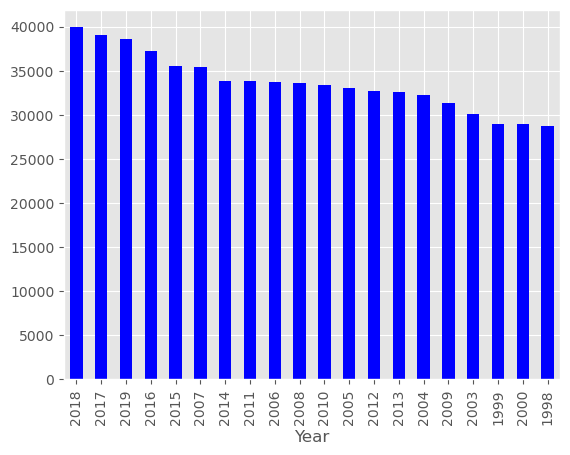

In [113]:
print('Suggested features of first df: ', df0columns)
print('\n')
bar = input('Would you like to plot bar graphs for first df? Y/y or N/n?' )
while bar == 'Y' or bar == 'y': 
    choice = input('What feature should be plotted?')
    dfid = input('And in the first df? Y/y or N/n?')
    if (choice in df0columns) and (dfid == 'Y' or dfid == 'y'):
        print('Plot top 5 chart of first df:')
        print(choice, "Chart")
        ax0 = df0noindex[choice].value_counts().head(20).plot(kind = 'bar', color = 'blue', fontsize = 10)
    else:
        print('Cannot plot the graph')
    
    bar = input('Repeat? Y/y or N/n?' )
    if bar == 'N' or bar == 'n':
        break

Suggested features of last df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot top 5 chart of last df:
carrier Chart


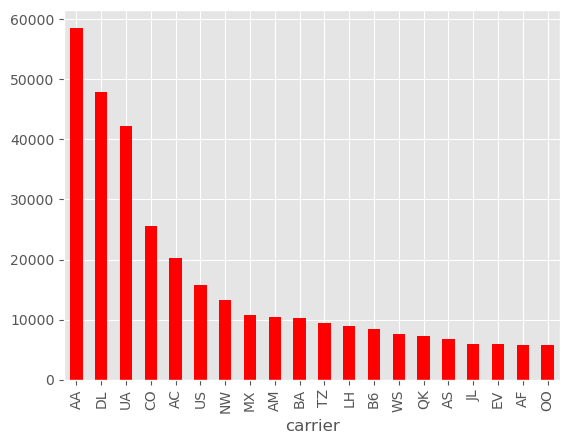

In [114]:
print('Suggested features of last df: ', df_1columns)
print('\n')
bar = input('Would you like to plot bar graphs for last df? Y/y or N/n?' )
while bar == 'Y' or bar == 'y':
    choice = input('What feature should be plotted?')
    dfid = input('And in the last df? Y/y or N/n?')
    if (choice in df_1columns) and (dfid == 'Y' or dfid == 'y'):
        print('Plot top 5 chart of last df:')
        print(choice, "Chart")
        ax_1 = df_1noindex[choice].value_counts().head(20).plot(kind = 'bar', color = 'red', fontsize = 10)
    else:
        print('Cannot plot the graph')
    
    bar = input('Repeat? Y/y or N/n?' )
    if bar == 'N' or bar == 'n':
        break

Suggested features of first df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot top 5 chart of first df:
Year Chart


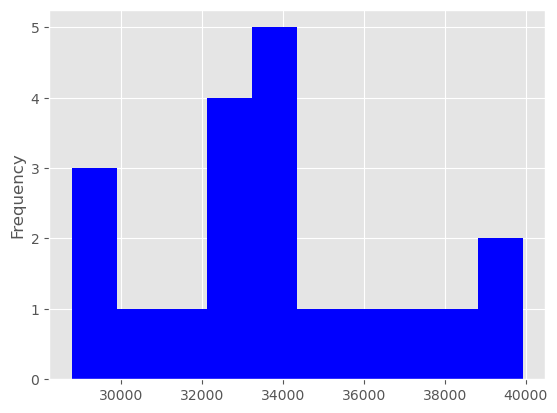

In [115]:
print('Suggested features of first df: ', df0columns)
print('\n')
hist = input('Would you like to plot histographs for first df? Y/y or N/n?' )
while hist == 'Y' or hist == 'y': 
    choice = input('What feature should be plotted?')
    dfid = input('And in the first df? Y/y or N/n?')
    if (choice in df0columns) and (dfid == 'Y' or dfid == 'y'):
        print('Plot top 5 chart of first df:')
        print(choice, "Chart")
        ax0 = df0noindex[choice].value_counts().head(20).plot(kind = 'hist', bins =10, color = 'blue', fontsize = 10)
    else:
        print('Cannot plot the graph')
    
    hist = input('Repeat? Y/y or N/n?' )
    if hist == 'N' or hist == 'n':
        break

Suggested features of last df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot top 5 chart of last df:
Charter Chart


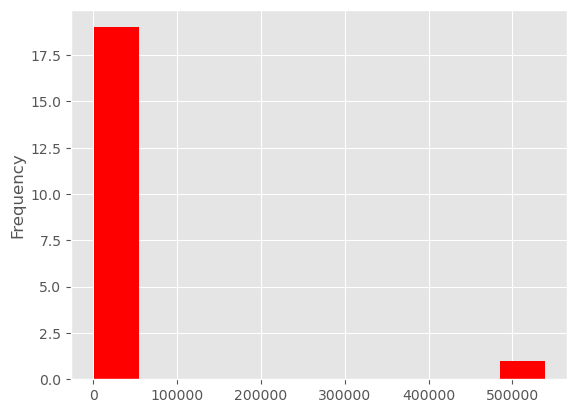

In [116]:
print('Suggested features of last df: ', df_1columns)
print('\n')
hist = input('Would you like to plot histographs for last df? Y/y or N/n?' )
while hist == 'Y' or hist == 'y':
    choice = input('What feature should be plotted?')
    dfid = input('And in the last df? Y/y or N/n?')
    if (choice in df_1columns) and (dfid == 'Y' or dfid == 'y'):
        print('Plot top 5 chart of last df:')
        print(choice, "Chart")
        ax_1 = df_1noindex[choice].value_counts().head(20).plot(kind = 'hist', bins = 10, color = 'red', fontsize = 10)
    else:
        print('Cannot plot the graph')
    
    hist = input('Repeat? Y/y or N/n?' )
    if hist == 'N' or hist == 'n':
        break

Suggested features of first df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot top 5 chart of first df:
fg_wac Chart


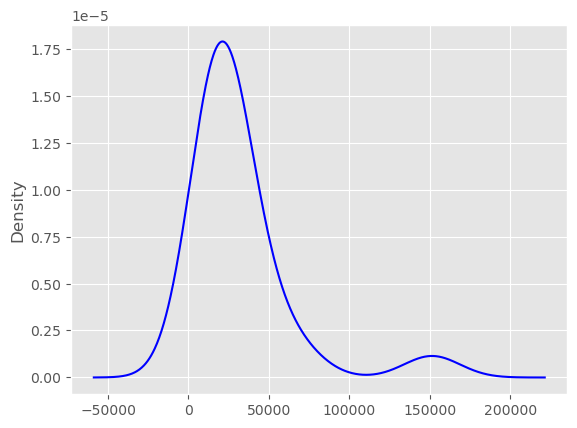

In [118]:
print('Suggested features of first df: ', df0columns)
print('\n')
kde = input('Would you like to plot kde graphs for first df? Y/y or N/n?' )
while kde == 'Y' or kde == 'y': 
    choice = input('What feature should be plotted?')
    dfid = input('And in the first df? Y/y or N/n?')
    if (choice in df0columns) and (dfid == 'Y' or dfid == 'y'):
        print('Plot top 5 chart of first df:')
        print(choice, "Chart")
        ax0 = df0noindex[choice].value_counts().head(20).plot(kind = 'kde', color = 'blue', fontsize = 10)
    else:
        print('Cannot plot the graph')
    
    kde = input('Repeat? Y/y or N/n?' )
    if kde == 'N' or kde == 'n':
        break

Suggested features of last df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot top 5 chart of last df:
carrier Chart


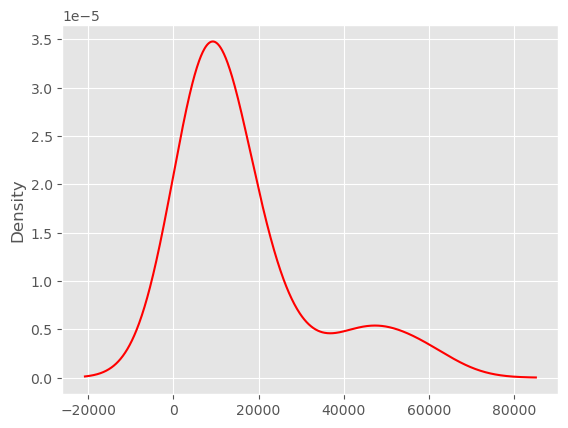

In [119]:
print('Suggested features of last df: ', df_1columns)
print('\n')
kde = input('Would you like to plot kde graphs for last df? Y/y or N/n?' )
while kde == 'Y' or kde == 'y':
    choice = input('What feature should be plotted?')
    dfid = input('And in the last df? Y/y or N/n?')
    if (choice in df_1columns) and (dfid == 'Y' or dfid == 'y'):
        print('Plot top 5 chart of last df:')
        print(choice, "Chart")
        ax_1 = df_1noindex[choice].value_counts().head(20).plot(kind = 'kde', color = 'red', fontsize = 10)
    else:
        print('Cannot plot the graph')
    
    kde = input('Repeat? Y/y or N/n?' )
    if kde == 'N' or kde == 'n':
        break

## Feature Realtionships and Visualisation

Suggested features of first df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot relation scatter chart of first df:
Month vs fg_wac  Chart


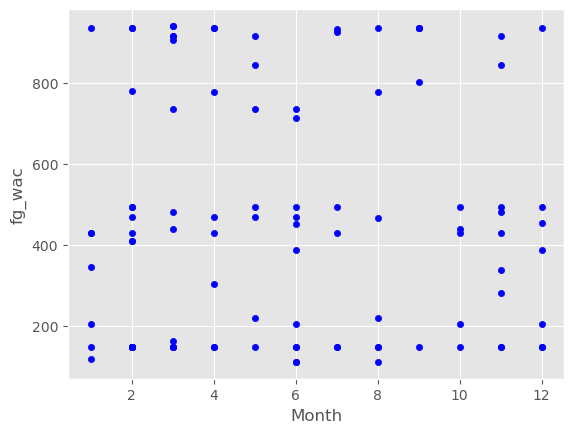

In [126]:
print('Suggested features of first df: ', df0columns)
print('\n')
rel = input('Would you like to plot scatter graphs for first df? Y/y or N/n?' )
while rel == 'Y' or rel == 'y':
    x = input('What feature should be plotted as x-axis?')
    y = input('What feature should be plotted as y-axis?')
    #dfid = input('And in the last df? Y/y or N/n?')
    if (x in df0columns) and (y in df0columns):
        print('Plot relation scatter chart of first df:')
        print(x, 'vs', y, " Chart")
        ax0 = df0noindex.head(100).plot(kind = 'scatter', x = x, y = y, color = 'blue', fontsize = 10)
        plt.show()
    else:
        print('Cannot plot the graph')
    
    rel = input('Repeat? Y/y or N/n?' )
    if rel == 'N' or rel == 'n':
        break

Suggested features of last df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot relation scatter chart of last df:
Year vs carrier  Chart


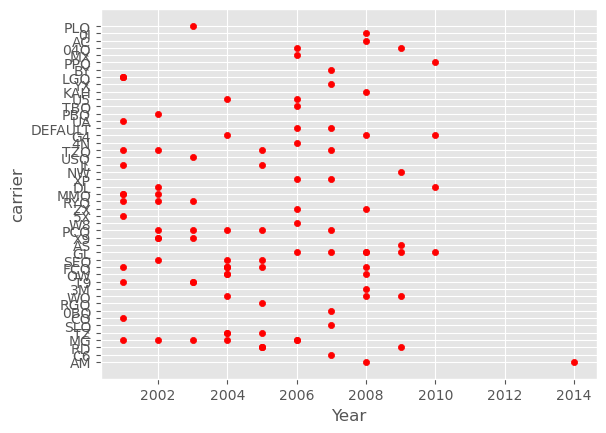

In [124]:
#plot relationship between 2 user defined features
print('Suggested features of last df: ', df_1columns)
print('\n')
rel = input('Would you like to plot scatter graphs for last df? Y/y or N/n?' )
while rel == 'Y' or rel == 'y':
    x = input('What feature should be plotted as x-axis?')
    y = input('What feature should be plotted as y-axis?')
    #dfid = input('And in the last df? Y/y or N/n?')
    if (x in df_1columns) and (y in df_1columns):
        print('Plot relation scatter chart of last df:')
        print(x, 'vs', y, " Chart")
        ax_1 = df_1noindex.head(100).plot(kind = 'scatter', x = x, y = y, color = 'red', fontsize = 10)
        plt.show()
    else:
        print('Cannot plot the graph')
    
    rel = input('Repeat? Y/y or N/n?' )
    if rel == 'N' or rel == 'n':
        break

Suggested features of first df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot relation scatter chart of first df:
Year vs Scheduled  Chart


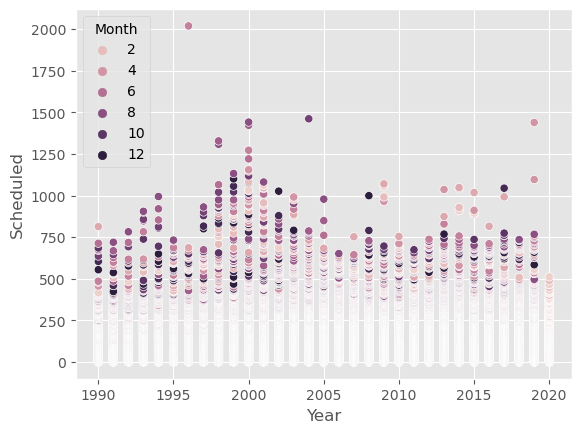

In [130]:
#use sns
print('Suggested features of first df: ', df0columns)
print('\n')
rel = input('Use seaborn to graph scatter plots? Y/y or N/n?' )
while rel == 'Y' or rel == 'y':
    x = input('What feature should be plotted as x-axis?')
    y = input('What feature should be plotted as y-axis?')
    hue = input('What feature is the hue?')
    #dfid = input('And in the last df? Y/y or N/n?')
    if (x in df0columns) and (y in df0columns):
        print('Plot relation scatter chart of first df:')
        print(x, 'vs', y, " Chart")
        ax0 = sns.scatterplot( x = x, y = y, hue = hue, data = df0noindex)
        plt.show()
    else:
        print('Cannot plot the graph')
    
    rel = input('Repeat? Y/y or N/n?' )
    if rel == 'N' or rel == 'n':
        break

Suggested features of last df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot relation scatter chart of first df:
Charter vs Year  Chart


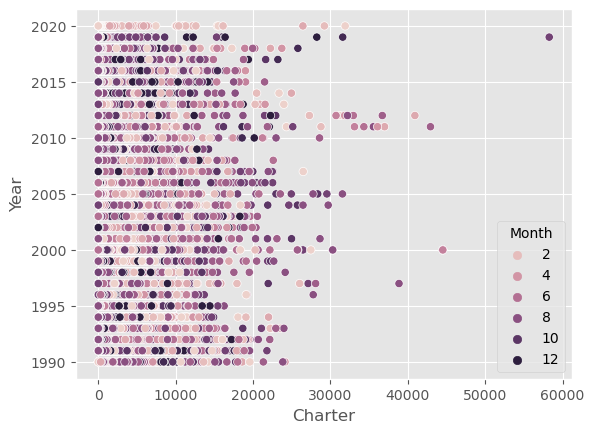

In [131]:
#use sns
print('Suggested features of last df: ', df_1columns)
print('\n')
rel = input('Use seaborn to graph scatter plots? Y/y or N/n?' )
while rel == 'Y' or rel == 'y':
    x = input('What feature should be plotted as x-axis?')
    y = input('What feature should be plotted as y-axis?')
    hue = input('What feature is the hue?')
    #dfid = input('And in the last df? Y/y or N/n?')
    if (x in df_1columns) and (y in df_1columns):
        print('Plot relation scatter chart of last df:')
        print(x, 'vs', y, " Chart")
        ax_1 = sns.scatterplot( x = x, y = y, hue = hue, data = df_1noindex)
        plt.show()
    else:
        print('Cannot plot the graph')
    
    rel = input('Repeat? Y/y or N/n?' )
    if rel == 'N' or rel == 'n':
        break

In [253]:
#df0corr = df0noindex.dropna().corr()   ##correlation chart of first dataset

In [254]:
#sns.heatmap(df0corr, annot = True)

In [255]:
#df_1corr = df_1noindex.dropna().corr()   ##correlation chart of last dataset

In [256]:
#sns.heatmap(df_1corr, annot = True)

In [257]:
#sns.pairplot(df0noindex, vars = df0numerical)

In [258]:
#sns.pairplot(df0noindex, vars = df0categorical)

In [259]:
#sns.pairplot(df_1noindex, vars = df_1numerical)

In [260]:
#sns.pairplot(df_1noindex, vars = df_1categorical)

# AUTOMATED ANALYSIS SUMMARY

### Required Python Libraries and Functions

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
import sys as sys
import time
from IPython.display import display
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [ ]:
#if csv/if excel/if sql/ allow for reading different types of files
def read (filename, filetype):
    if filetype == '.csv':
        df = pd.read_csv(filename)
    elif filetype == '.xslx':
        df = pd.read_excel(filename)
    elif filetype == '.sql':
        #df = pd.read_sql(sql, con, index_col=None) ##get the right libraries
        print('Please use sql engine and connect to sql database')
    return df

In [ ]:
def listfiles (directory, extension):
    # user can input any directory here as well
    # if the user wants another file added, just add it to this directory and rerun the code
    filenames = []
    for file in os.listdir():
        if file.endswith(extension):
            filenames.append(file)
        else:
            continue
    return filenames

In [ ]:
#return 2 lists, Numerical columns and Categorical columns
def types(Dataframe):
    numerical = Dataframe.select_dtypes(exclude = ['object']).columns.tolist()
    categorical = Dataframe.select_dtypes(include = ['object']).columns.tolist()
    return numerical, categorical

In [ ]:
def nullvalues(Dataframe, dfcolumns):
    #identify column index with nulls and remove them
    nullindices =[]
    for col in range(len(dfcolumns)):
        if (Dataframe[dfcolumns[col]].isna().sum()) == 0:
            print('Column : ',dfcolumns[col], 'has no null values')
            df = Dataframe
        else:
            nullindices.append(col)
            print('___________________')
            print('Column : ',dfcolumns[col], 'has null values\n')
            print('___________________')
            print('Potential Unique Values to Fill:\n', Dataframe[dfcolumns[col]].unique())
            value = input('Now, you should fill this column in a value of your choice: ')
            df = Dataframe.fillna(value, inplace = True)
    return nullindices, df

In [ ]:
def duplicaterows(Dataframe):
    duplicaterows = Dataframe[Dataframe.duplicated()]
    if duplicaterows.empty:
        print('No duplicated rows found')
        df = Dataframe##don't drop duplicates
    else:
        print(duplicaterows)##drop duplicates
        df = Dataframe.drop_duplicates(keep = 'last', inplace = True)
    return duplicaterows, df

In [ ]:
def duplicatecols(Dataframe):
    duplicatecols = Dataframe.columns[Dataframe.columns.duplicated()]
    if duplicatecols.empty:
        print('There are no duplicated cols in this dataframe')
        df = Dataframe##don't drop duplicates
    else:
        print(duplicatecols)
        df = Dataframe.drop(columns = duplicatecols, inplace = True)##drop duplicates
    return duplicatecols, df

In [315]:
def editcols(Dataframe, dfcols):
    Dataframeold = Dataframe.copy()
    for i in range(len(dfcols)):
        if Dataframe[dfcols[i]].str.contains('/') == True:
            print('This column contains / \n')
            Dataframe.drop(columns = dfcols[i], inplace = True)
        elif Dataframe[dfcols[i]].str.contains('-') == True:
            print('This column contains - \n')
            Dataframe.drop(columns = dfcols[i], inplace = True)
        elif Dataframe[dfcols[i]].str.contains(',') == True:
            print('This column contains , \n')
            Dataframe.drop(columns = dfcols[i], inplace = True)
        #elif Dataframe[dfcols[i]].str.contains(str(\)) == True:
        #    print('This column contains \ \n')
        #    Dataframe.drop(columns = dfcols[i], inplace = True)
        else:
            print('This is an okay column \n')
    return Dataframeold, Dataframe

### STEP 1:LOADING DATA: LOAD AND READ DATASET

In [285]:
print('READING FILES FROM DIRECTORY EDA-airlines-project:\n')
# list directory
directory = 'EDA-airlines-project'
extension = ('.csv', '.xslx', '.sql')
filenames = listfiles(directory, extension)
readfiles = []
renames = []
for i in range(len(filenames)):
    print('File to be read:', filenames[i],'\n')
    index = os.path.splitext(filenames[i])  ##returns tuple
    file_name = index[0]
    renames.append(file_name)
    readfiles.append(file_name)
    print('File name:', file_name,'\n')
    file_ext = index[1]
    print('File extension:', file_ext,'\n')
    readfiles[i] = read(filenames[i], file_ext)
    
print('DONE...\n')

print('LOADING SAMPLES OF THE DATASET(S):\n')
dfcount = len(readfiles)
print('THE TOTAL NUMBER OF DATASETS IN THIS DIRECTORY IS: ', dfcount, '\n')
if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('SAMPLE OF THE FIRST DATASET:\n')
    display(readfiles[0].sample())
    print('___________________________________________________________________\n')
    print('SAMPLE OF THE LAST DATASET:\n')
    display(readfiles[dfcount - 1].sample())
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('SAMPLE OF THE DATASET:\n')
    display(readfiles[0].sample())
    print('___________________________________________________________________\n')
    
print('DONE...\n')

READING FILES FROM DIRECTORY EDA-airlines-project:

File to be read: International_Report_Departures.csv 

File name: International_Report_Departures 

File extension: .csv 

File to be read: International_Report_Passengers.csv 

File name: International_Report_Passengers 

File extension: .csv 

DONE...

LOADING SAMPLES OF THE DATASET(S):

THE TOTAL NUMBER OF DATASETS IN THIS DIRECTORY IS:  2 

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

SAMPLE OF THE FIRST DATASET:



,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
278636,06/01/2010,2010,6,15070,SWF,22,14293,PUJ,224,19704,CO,1,Departures,1,0,1


___________________________________________________________________

SAMPLE OF THE LAST DATASET:



,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
399002,07/01/1997,1997,7,12016,GUM,5,15237,TKK,810,20017,CS,1,Passengers,5476,0,5476


___________________________________________________________________

DONE...



### STEP 2:UNDERSTANDING DATA: DESCRIBE AND BRIEF THE DATASET

In [275]:
print('BRIEFING OF THE DATASETS:\n')
if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('BRIEF OF THE FIRST DATASET:\n')
    display(readfiles[0].info())
    print('___________________________________________________________________\n')
    print('BRIEF OF THE LAST DATASET:\n')
    display(readfiles[dfcount - 1].info())
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('BRIEF OF THE DATASET:\n')
    display(readfiles[0].info())
    print('___________________________________________________________________\n')

print('DONE...\n')
print('DESCRIBING THE DATASETS:\n')
if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('DESCRIBE THE FIRST DATASET:\n')
    display(readfiles[0].describe())
    print('___________________________________________________________________\n')
    print('DESCRIBE THE LAST DATASET:\n')
    display(readfiles[dfcount - 1].describe())
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('DESCRIBE THE DATASET:\n')
    display(readfiles[0].info())
    print('___________________________________________________________________\n')

print('DONE...\n')

BRIEFING OF THE DATASETS:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

BRIEF OF THE FIRST DATASET:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  int64 
dty

None

___________________________________________________________________

BRIEF OF THE LAST DATASET:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680985 entries, 0 to 680984
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      680985 non-null  object
 1   Year          680985 non-null  int64 
 2   Month         680985 non-null  int64 
 3   usg_apt_id    680985 non-null  int64 
 4   usg_apt       680985 non-null  object
 5   usg_wac       680985 non-null  int64 
 6   fg_apt_id     680985 non-null  int64 
 7   fg_apt        680985 non-null  object
 8   fg_wac        680985 non-null  int64 
 9   airlineid     680985 non-null  int64 
 10  carrier       678188 non-null  object
 11  carriergroup  680985 non-null  int64 
 12  type          680985 non-null  object
 13  Scheduled     680985 non-null  int64 
 14  Charter       680985 non-null  int64 
 15  Total         680985 non-null  int64 
dtypes: int64(11),

None

___________________________________________________________________

DONE...

DESCRIBING THE DATASETS:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

DESCRIBE THE FIRST DATASET:



,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000
mean,2006.021361,6.414783,12809.473781,42.511740,13484.676238,466.910479,20057.217505,0.599361,40.003181,2.005483,42.008665
std,8.558831,3.471070,2716.223845,27.571338,1932.601107,288.005971,479.071456,0.490028,60.948973,8.278403,60.340835
min,1990.000000,1.000000,10010.000000,1.000000,10119.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11868.000000,205.000000,19704.000000,0.000000,0.000000,0.000000,3.000000
50%,2007.000000,6.000000,12892.000000,33.000000,13408.000000,427.000000,19991.000000,1.000000,17.000000,0.000000,20.000000
75%,2014.000000,9.000000,13487.000000,72.000000,15084.000000,736.000000,20312.000000,1.000000,60.000000,1.000000,60.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,2019.000000,1092.000000,2019.000000


___________________________________________________________________

DESCRIBE THE LAST DATASET:



,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000
mean,2006.141110,6.366576,12779.103825,44.394527,13493.331869,468.122264,20031.610461,0.562233,6478.893801,196.740288,6675.634089
std,8.716122,3.466745,2510.939346,28.110753,1955.917890,292.799407,510.270976,0.496112,8622.704655,954.759814,8532.400269
min,1990.000000,1.000000,10010.000000,1.000000,10125.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11760.000000,204.000000,19623.000000,0.000000,142.000000,0.000000,633.000000
50%,2007.000000,6.000000,12889.000000,33.000000,13408.000000,429.000000,19917.000000,1.000000,3561.000000,0.000000,3803.000000
75%,2014.000000,9.000000,13796.000000,74.000000,15092.000000,736.000000,20312.000000,1.000000,9700.000000,0.000000,9761.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,149898.000000,58284.000000,150195.000000


___________________________________________________________________

DONE...



### STEP 3:UNDERSTANDING DATA: IDENTIFY COLUMN TYPES IN DATASET

In [281]:
print('LISTING THE COLUMNS IN THE DATASET:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('COLUMNS OF THE FIRST DATASET:\n')
    df0columns = readfiles[0].columns
    display(df0columns)
    print('___________________________________________________________________\n')
    print('COLUMNS OF THE LAST DATASET:\n')
    df_1columns = readfiles[dfcount - 1].columns
    display(df_1columns)
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('COLUMNS OF THE DATASET:\n')
    df0columns = readfiles[0].columns
    display(df0columns)
    print('___________________________________________________________________\n')

print('DONE...\n')

print('IDENTIFYING THE TYPES OF COLUMNS IN THE DATASET:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('COLUMN TYPES OF THE FIRST DATASET:\n')
    df0dtypes = readfiles[0].dtypes 
    display(df0dtypes)
    print('___________________________________________________________________\n')
    print('COLUMN TYPES OF THE LAST DATASET:\n')
    df_1dtypes = readfiles[dfcount - 1].dtypes
    display(df_1dtypes)
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('COLUMN TYPES OF THE DATASET:\n')
    df0dtypes = readfiles[0].dtypes
    display(df0dtypes)
    print('___________________________________________________________________\n')

print('DONE...\n')

print('IDENTIFYING THE TYPES OF COLUMNS INTO EITHER NUMERICAL OR CATEGORICAL IN THE DATASET:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('NUMERICAL TYPE COLUMNS OF THE FIRST DATASET:\n')
    df0numerical, df0categorical = types(readfiles[0])
    display(df0numerical)
    print('CATEGORICAL TYPE COLUMNS OF THE FIRST DATASET:\n')
    display(df0categorical)
    print('___________________________________________________________________\n')
    print('NUMERICAL TYPE COLUMNS OF THE LAST DATASET:\n')
    df_1numerical, df_1categorical = types(readfiles[dfcount - 1])
    display(df_1numerical)
    print('CATEGORICAL TYPE COLUMNS OF THE LAST DATASET:\n')
    display(df_1categorical)
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('NUMERICAL TYPE COLUMNS OF THE DATASET:\n')
    df0numerical, df0categorical = types(readfiles[0])
    display(df0numerical)
    print('CATEGORICAL TYPE COLUMNS OF THE DATASET:\n')
    display(df0categorical)
    print('___________________________________________________________________\n')

print('DONE...\n')

LISTING THE COLUMNS IN THE DATASET:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

COLUMNS OF THE FIRST DATASET:



Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

___________________________________________________________________

COLUMNS OF THE LAST DATASET:



Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

___________________________________________________________________

DONE...

IDENTIFYING THE TYPES OF COLUMNS IN THE DATASET:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

COLUMN TYPES OF THE FIRST DATASET:



data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object

___________________________________________________________________

COLUMN TYPES OF THE LAST DATASET:



data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object

___________________________________________________________________

DONE...

IDENTIFYING THE TYPES OF COLUMNS INTO EITHER NUMERICAL OR CATEGORICAL IN THE DATASET:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

NUMERICAL TYPE COLUMNS OF THE FIRST DATASET:



['Year',
 'Month',
 'usg_apt_id',
 'usg_wac',
 'fg_apt_id',
 'fg_wac',
 'airlineid',
 'carriergroup',
 'Scheduled',
 'Charter',
 'Total']

CATEGORICAL TYPE COLUMNS OF THE FIRST DATASET:



['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type']

___________________________________________________________________

NUMERICAL TYPE COLUMNS OF THE LAST DATASET:



['Year',
 'Month',
 'usg_apt_id',
 'usg_wac',
 'fg_apt_id',
 'fg_wac',
 'airlineid',
 'carriergroup',
 'Scheduled',
 'Charter',
 'Total']

CATEGORICAL TYPE COLUMNS OF THE LAST DATASET:



['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type']

___________________________________________________________________

DONE...



### STEP 4:PREPARING DATA: HANDLE NULLS

In [286]:
print('IDENTIFY AND HANDLE NULL VALUES:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('NULL HANDLING OF THE FIRST DATASET:\n')
    nullindices0, df0 = nullvalues(readfiles[0], df0columns)
    display('NULL INDICES:', nullindices0)
    print('___________________________________________________________________\n')
    print('NULL HANDLING OF THE LAST DATASET:\n')
    nullindices_1, df_1 = nullvalues(readfiles[dfcount - 1], df_1columns)
    display('NULL INDICES:', nullindices_1)
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('NULL HANDLING OF THE DATASET:\n')
    nullindices0, df0 = nullvalues(readfiles[0], df0columns)
    display('NULL INDICES:', nullindices0)
    print('___________________________________________________________________\n')

print('DONE...\n')
#nullindices0, df0renamed = nullvalues(readfiles[0], df0columns)

IDENTIFY AND HANDLE NULL VALUES:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

NULL HANDLING OF THE FIRST DATASET:

Column :  data_dte has no null values
Column :  Year has no null values
Column :  Month has no null values
Column :  usg_apt_id has no null values
Column :  usg_apt has no null values
Column :  usg_wac has no null values
Column :  fg_apt_id has no null values
Column :  fg_apt has no null values
Column :  fg_wac has no null values
Column :  airlineid has no null values
___________________
Column :  carrier has null values

___________________
Potential Unique Values to Fill:
 ['PFQ' '5Y' 'GL' 'AMQ' '5L' 'JN' 'MMQ' 'AC' 'U5' 'GFQ' 'AM' 'L2' 'TZ' 'WO'
 'EZ' nan 'VSA' 'T9' 'AUQ' '3M' 'KAQ' 'LH' '9S' 'GG' 'WAP' 'SLQ' 'XP' 'U7'
 'PCQ' '13Q' 'GR' 'PRQ' 'TRA' 'JL' 'ABX' 'FX' 'E9' 'EUQ' 'PN' 'RYQ' '6B'
 'PT' 'MG' 'RD' 'CC' 'POQ' 'CS' 'RNQ' 'A2' 'PLQ' 'DL' 'XG' 'KE' 'SVW'
 'VIQ' 'CCQ' 'NLQ' 'ZX' 'BNQ' 'BRQ' 'W8' 'AD' 'CYQ' 'X9' 'CEQ' '8C' 'MX'
 '0WQ' 'CAQ' 'TCQ' 'LGQ' 'G

[10]

___________________________________________________________________

NULL HANDLING OF THE LAST DATASET:

Column :  data_dte has no null values
Column :  Year has no null values
Column :  Month has no null values
Column :  usg_apt_id has no null values
Column :  usg_apt has no null values
Column :  usg_wac has no null values
Column :  fg_apt_id has no null values
Column :  fg_apt has no null values
Column :  fg_wac has no null values
Column :  airlineid has no null values
___________________
Column :  carrier has null values

___________________
Potential Unique Values to Fill:
 ['AM' 'C6' 'RD' 'MG' 'TZ' 'SLQ' 'CO' '0BQ' 'RGQ' 'WO' '3M' 'T9' 'OW' 'FCQ'
 'SEQ' 'GL' 'AS' 'X9' 'PCQ' 'W8' '5X' 'ZX' 'RYQ' 'MMQ' 'DL' 'XP' 'NW' 'JL'
 'USQ' 'TZQ' '4N' 'G4' nan 'UA' 'PBQ' 'TBQ' 'U5' 'KAH' 'YX' 'LGQ' 'BY'
 'PPQ' 'MX' '04Q' 'AC' '0J' 'PLQ' 'SY' 'CAZ' 'F9' 'BNQ' 'SVW' '09Q' 'CS'
 'CC' 'RNQ' 'AA' 'PN' '4T' '8E' 'GBQ' 'B6' '0CQ' 'XG' '5L' 'BZQ' '14Q'
 'E9' 'DE' 'S4' '05Q' 'MT' '0JQ' 'KE' 'CAQ' '0UQ' 

### STEP 5:PREPARING DATA: DROP DUPLICATES

In [289]:
print('IDENTIFY AND DROP DUPLICATE VALUES:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('DUPLICATE HANDLING OF THE FIRST DATASET:\n')
    duplicaterows0, df0 = duplicaterows(df0)
    print('DUPLICATE ROWS:', duplicaterows0, '\n')
    duplicatecols0, df0 = duplicatecols(df0)
    print('DUPLICATE COLUMNS:', duplicatecols0, '\n')
    print('___________________________________________________________________\n')
    print('DUPLICATE HANDLING OF THE LAST DATASET:\n')
    duplicaterows_1, df_1 = duplicaterows(df_1)
    print('DUPLICATE ROWS:', duplicaterows_1, '\n')
    duplicatecols_1, df_1 = duplicatecols(df_1)
    print('DUPLICATE COLUMNS:', duplicatecols_1, '\n')
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('DUPLICATE HANDLING OF THE DATASET:\n')
    duplicaterows0, df0 = duplicaterows(df0)
    print('DUPLICATE ROWS:', duplicaterows0, '\n')
    duplicatecols0, df0 = duplicatecols(df0)
    print('DUPLICATE COLUMNS:', duplicatecols0, '\n')
    print('___________________________________________________________________\n')

print('DONE...\n')
#duplicaterows0, df0 = duplicaterows(df0)
#duplicatecols0, df0 = duplicatecols(df0)

IDENTIFY AND DROP DUPLICATE VALUES:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

DUPLICATE HANDLING OF THE FIRST DATASET:

No duplicated rows found
DUPLICATE ROWS: Empty DataFrame
Columns: [data_dte, Year, Month, usg_apt_id, usg_apt, usg_wac, fg_apt_id, fg_apt, fg_wac, airlineid, carrier, carriergroup, type, Scheduled, Charter, Total]
Index: [] 

There are no duplicated cols in this dataframe
DUPLICATE COLUMNS: Index([], dtype='object') 

___________________________________________________________________

DUPLICATE HANDLING OF THE LAST DATASET:

No duplicated rows found
DUPLICATE ROWS: Empty DataFrame
Columns: [data_dte, Year, Month, usg_apt_id, usg_apt, usg_wac, fg_apt_id, fg_apt, fg_wac, airlineid, carrier, carriergroup, type, Scheduled, Charter, Total]
Index: [] 

There are no duplicated cols in this dataframe
DUPLICATE COLUMNS: Index([], dtype='object') 

___________________________________________________________________

DONE...



### STEP 6:PLOTTING FEATURES: CORRELATION MAP

In [313]:
print('CALCULATE CORRELATION OF EACH DATASET:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('CORRELATION OF NUMERICAL COLUMNS OF THE FIRST DATASET:\n')
    df0corr = df0[df0numerical].dropna().corr()
    display(df0corr)
    print('___________________________________________________________________\n')
    print('CORRELATION OF NUMERICAL COLUMNS OF THE LAST DATASET:\n')
    df_1corr = df_1[df_1numerical].dropna().corr()
    display(df_1corr)
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('CORRELATION OF NUMERICAL COLUMNS OF THE DATASET:\n')
    df0corr = df0[df0numerical].dropna().corr()
    display(df0corr)
    print('___________________________________________________________________\n')

print('DONE...\n')

CALCULATE CORRELATION OF EACH DATASET:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

CORRELATION OF NUMERICAL COLUMNS OF THE FIRST DATASET:



,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
Year,1.000000,-0.021233,0.005048,0.065969,0.053412,0.045974,0.312519,0.022367,0.069213,-0.052756,0.062673
Month,-0.021233,1.000000,-0.000944,-0.001765,-0.000760,0.017482,-0.004098,-0.007390,0.013036,-0.007488,0.012140
usg_apt_id,0.005048,-0.000944,1.000000,0.069199,0.030126,-0.002550,0.050586,-0.008993,-0.022789,0.000585,-0.022939
usg_wac,0.065969,-0.001765,0.069199,1.000000,0.096134,-0.043867,-0.004251,-0.050752,0.041788,-0.024382,0.038864
fg_apt_id,0.053412,-0.000760,0.030126,0.096134,1.000000,0.505629,0.076175,-0.002074,0.082709,-0.027337,0.079792
fg_wac,0.045974,0.017482,-0.002550,-0.043867,0.505629,1.000000,-0.002809,-0.148620,0.109073,-0.039502,0.104752
airlineid,0.312519,-0.004098,0.050586,-0.004251,0.076175,-0.002809,1.000000,0.116642,-0.144813,0.081447,-0.135098
carriergroup,0.022367,-0.007390,-0.008993,-0.050752,-0.002074,-0.148620,0.116642,1.000000,-0.026875,0.040866,-0.021539
Scheduled,0.069213,0.013036,-0.022789,0.041788,0.082709,0.109073,-0.144813,-0.026875,1.000000,-0.141007,0.990733
Charter,-0.052756,-0.007488,0.000585,-0.024382,-0.027337,-0.039502,0.081447,0.040866,-0.141007,1.000000,-0.005234


___________________________________________________________________

CORRELATION OF NUMERICAL COLUMNS OF THE LAST DATASET:



,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
Year,1.000000,-0.016399,0.007141,0.052941,0.051617,0.036911,0.331199,0.035147,0.101612,-0.129603,0.088185
Month,-0.016399,1.000000,-0.000288,0.000012,-0.001978,0.021702,-0.006513,-0.014229,0.033731,-0.016936,0.032193
usg_apt_id,0.007141,-0.000288,1.000000,0.075745,0.035645,0.025577,0.048309,-0.038074,-0.021915,0.010481,-0.020974
usg_wac,0.052941,0.000012,0.075745,1.000000,0.089745,-0.031150,-0.016639,-0.036533,0.034814,-0.020994,0.032833
fg_apt_id,0.051617,-0.001978,0.035645,0.089745,1.000000,0.534591,0.085683,-0.028446,-0.086146,-0.051050,-0.092770
fg_wac,0.036911,0.021702,0.025577,-0.031150,0.534591,1.000000,0.012183,-0.193238,0.085149,-0.061695,0.079146
airlineid,0.331199,-0.006513,0.048309,-0.016639,0.085683,0.012183,1.000000,0.079921,-0.235533,0.045278,-0.232959
carriergroup,0.035147,-0.014229,-0.038074,-0.036533,-0.028446,-0.193238,0.079921,1.000000,-0.073252,-0.008559,-0.074985
Scheduled,0.101612,0.033731,-0.021915,0.034814,-0.086146,0.085149,-0.235533,-0.073252,1.000000,-0.149451,0.993860
Charter,-0.129603,-0.016936,0.010481,-0.020994,-0.051050,-0.061695,0.045278,-0.008559,-0.149451,1.000000,-0.039135


___________________________________________________________________

DONE...



PLOTTING THE CORRELATION OF EACH DATASET:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

PLOTTING CORRELATION OF THE FIRST AND LAST DATASETS:



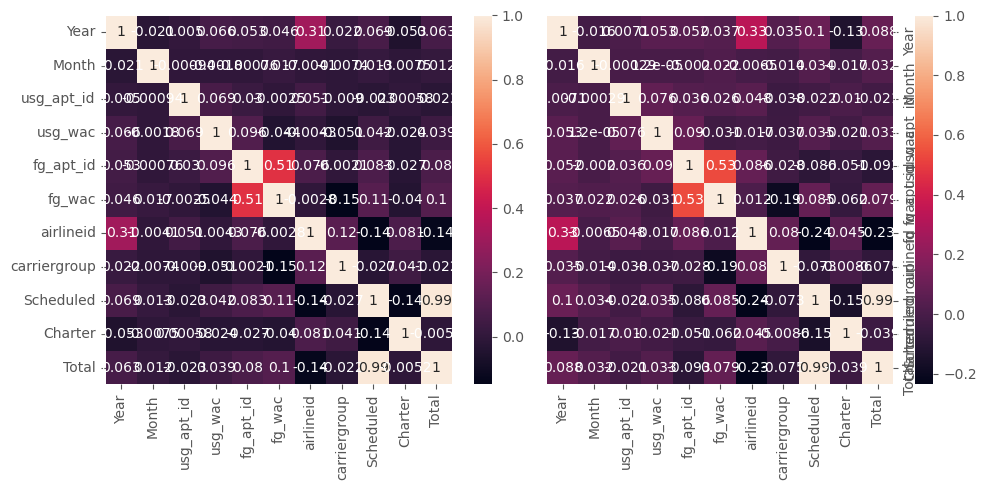

___________________________________________________________________

DONE...



In [334]:
print('PLOTTING THE CORRELATION OF EACH DATASET:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('PLOTTING CORRELATION OF THE FIRST AND LAST DATASETS:\n')
    plt.rcParams["figure.figsize"] = [10, 5]
    plt.rcParams["figure.autolayout"] = True
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    fig.subplots_adjust(wspace=0.01)
    sns.heatmap(df0corr, ax=ax1, annot = True)
    sns.heatmap(df_1corr, ax=ax2, annot = True)
    ax2.yaxis.tick_right()
    fig.subplots_adjust(wspace=0.001)
    plt.show()
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('PLOTTING CORRELATION OF THE DATASET:\n')
    df0heatmap = sns.heatmap(df0corr, annot = True)
    display(df0heatmap)
    print('___________________________________________________________________\n')

print('DONE...\n')

### STEP 7:PLOTTING FEATURES: PAIRPLOT

In [350]:
print('PLOTTING THE PAIRPLOT OF EACH DATASET:\n')
flag = -1
if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
    flag = -1
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('PLOTTING PAIRPLOTS OF THE FIRST AND LAST DATASETS:\n')
    flag = 1
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('PLOTTING PAIRPLOTS OF THE DATASET:\n')
    flag = 0
    df0pairplot = sns.pairplot(df0, vars = df0numerical)
    display(df0pairplot)
    print('___________________________________________________________________\n')

print('DONE...\n')

PLOTTING THE PAIRPLOT OF EACH DATASET:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

PLOTTING PAIRPLOTS OF THE FIRST AND LAST DATASETS:

___________________________________________________________________

DONE...



In [ ]:
if flag == 1:
    sns.pairplot(df0, vars = df0numerical)
else:
    print('Wrong flag\n')
    
print('___________________________________________________________________\n')
print('DONE...\n')

In [ ]:
if flag == 1:
    sns.pairplot(df_1, vars = df_1numerical)
else:
    print('Wrong flag\n')
    
print('___________________________________________________________________\n')
print('DONE...\n')

# END OF AUTOMATED PROJECT 